In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

### Data Processing

In [2]:
dataset=pd.read_csv(r'C:/Users/maykan/Desktop/cluster/cars.csv')

df = dataset.iloc[:,:].values

df = pd.DataFrame(df)

df.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year','brand']

df.head()

#mpg:bir galon yakıtla gidebileceği mesafe mil cinsinden
#cubicinche : hacim
#hp : beygir gücü
#weightlbs: ağırlık
#time-to-60: 60 km hıza çıkış süresi
#brand: marka

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17,8,302,140,3449,11,1971,US.
3,15,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mpg          261 non-null    object
 1   cylinders    261 non-null    object
 2   cubicinches  261 non-null    object
 3   hp           261 non-null    object
 4   weightlbs    261 non-null    object
 5   time-to-60   261 non-null    object
 6   year         261 non-null    object
 7   brand        261 non-null    object
dtypes: object(8)
memory usage: 16.4+ KB


In [4]:
def to_num(s):
    try:
        return float(s)
    except:
        return None


data_col=df.columns
for i in data_col[:-1]:
    df[i]=df[i].apply(lambda x: to_num(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    float64
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    float64
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    float64
 6   year         261 non-null    float64
 7   brand        261 non-null    object 
dtypes: float64(7), object(1)
memory usage: 16.4+ KB


In [6]:
df['cubicinches']=df['cubicinches'].fillna((df['cubicinches'].mean()))
df['weightlbs']=df['weightlbs'].fillna((df['weightlbs'].mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    float64
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    float64
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    float64
 6   year         261 non-null    float64
 7   brand        261 non-null    object 
dtypes: float64(7), object(1)
memory usage: 16.4+ KB


In [7]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df.drop('brand',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df.index, columns=df.columns[:-1])
df_numeric_scaled.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,0.109290,1.0,0.728682,0.646739,0.767139,0.235294,0.083333
1,0.598361,0.2,0.054264,0.135870,0.092199,0.352941,0.750000
2,0.191257,1.0,0.604651,0.510870,0.542553,0.176471,0.000000
3,0.136612,1.0,0.857881,0.565217,0.634752,0.117647,0.000000
4,0.560109,0.2,0.077519,0.092391,0.129433,0.529412,0.583333


### Elbow Method

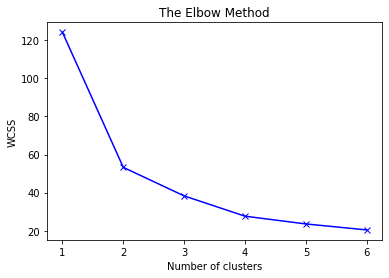

In [8]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_numeric_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### kmeans

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_numeric_scaled)
model=kmeans.fit(df_numeric_scaled)

In [10]:
df['cluster'] = kmeans.labels_

df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8.0,350.0,165.0,4209.0,12.0,1972.0,US.,1
1,31.9,4.0,89.0,71.0,1925.0,14.0,1980.0,Europe.,3
2,17.0,8.0,302.0,140.0,3449.0,11.0,1971.0,US.,1
3,15.0,8.0,400.0,150.0,3761.0,10.0,1971.0,US.,1
4,30.5,4.0,98.0,63.0,2051.0,17.0,1978.0,US.,3


In [11]:
df["cluster"].replace({0:"grup1",1:"grup2",2:"grup3",3:"grup4"}, inplace = True)
means_cls=df.groupby("cluster").agg('mean')
means_cls.T

cluster,grup1,grup2,grup3,grup4
mpg,25.491935,14.917808,19.977966,32.725373
cylinders,3.967742,8.000000,6.067797,4.044776
cubicinches,104.693548,352.095890,215.861658,112.089552
hp,80.451613,161.328767,101.271186,74.925373
weightlbs,2306.997312,4092.465753,3201.604520,2311.761194
time-to-60,16.596774,12.547945,16.389831,17.104478
year,1974.483871,1974.821918,1977.033898,1980.970149


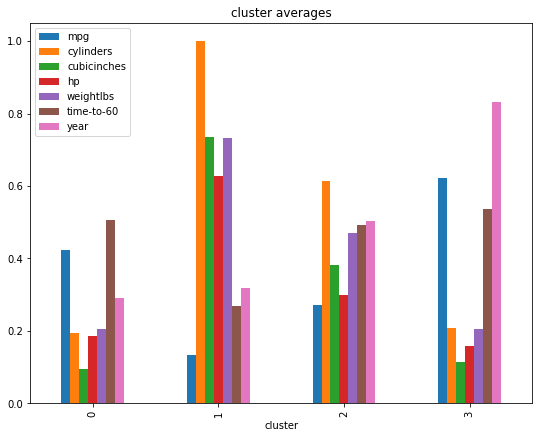

In [12]:
df_numeric_scaled['cluster'] = kmeans.labels_
df_numeric_scaled.groupby("cluster").agg('mean').plot.bar(figsize=(9,7))
plt.title("cluster averages")
plt.show()

### PCA 

In [14]:
df_numeric_scaled = df_numeric_scaled.drop('cluster', axis=1)

In [15]:
pca=PCA()
pca.fit(df_numeric_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

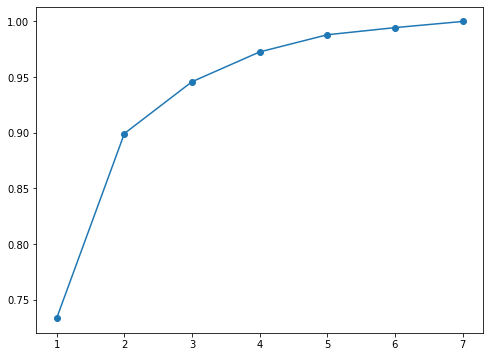

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.show()

In [17]:
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(df_numeric_scaled)

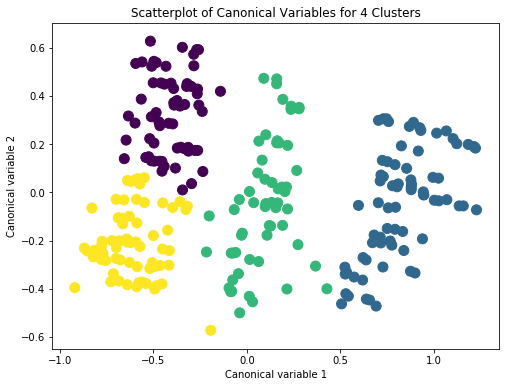

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x=dataset_questions_pca[:,0], y=dataset_questions_pca[:,1], c=model.labels_,s=100) 
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show() 